In [1]:
import numpy as np
import matplotlib.pyplot as plt

from DynamicESF import HedonicModels

import time

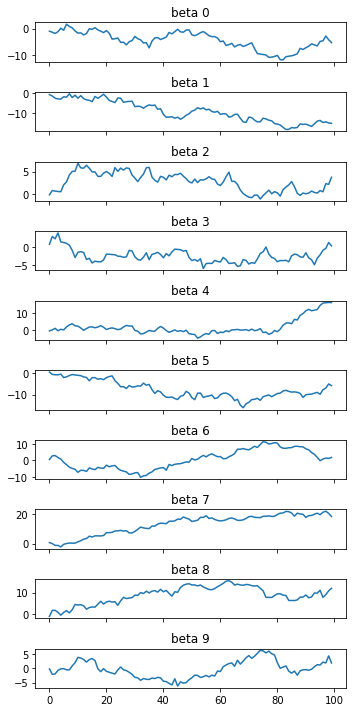

In [2]:
T = 100
D = 10
beta = np.cumsum(np.random.normal(size=(T,D)), axis=0)

fig, axes = plt.subplots(D, 1, sharex=True, figsize=(5, D*1))
for d in range(D):
    axes[d].set_title(f"beta {d}")
    axes[d].plot(range(T), beta[:,d])
fig.tight_layout()
fig.show()

In [3]:
def gen_data(N):
    X = np.random.normal(scale=2, size=(T,N,D))
    y = np.sum(beta[:,None] * X, axis=-1) + np.random.normal(scale=0.3, size=(T,N))

    return y, X

In [4]:
N = 10
y, X = gen_data(N)
maxiter = 1000

start = time.time()
model = HedonicModels.DynamicHedonic(y, X)
model.fit(maxiter)
elpstm = time.time() - start
print(elpstm)

Q=-1575.733:  10%|█         | 102/1000 [00:05<00:48, 18.52it/s]

5.523929119110107


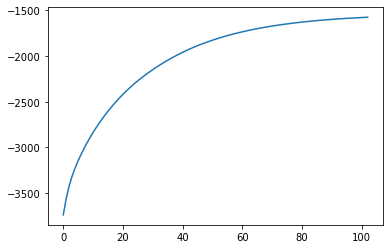

In [5]:
plt.plot(model.DLM.Q);

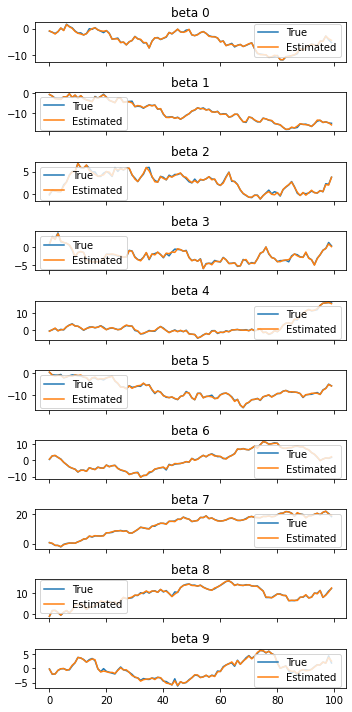

In [6]:
fig, axes = plt.subplots(D, 1, sharex=True, figsize=(5, D*1))
for d in range(D):
    axes[d].set_title(f"beta {d}")
    axes[d].plot(range(T), beta[:,d], label="True")
    axes[d].plot(range(T), model.beta[:,d], label="Estimated")
    axes[d].legend()
fig.tight_layout()
fig.show()

In [7]:
Ns = [1, 3, 5, 10, 20, 30, 40, 50, 100, 200]

elpstms = []
n_iter = []
for N in Ns:
    print(f"{N=}")
    y, X = gen_data(N)

    start = time.time()
    model = HedonicModels.DynamicHedonic(y, X)
    model.fit(maxiter)

    elpstms.append(time.time() - start)
    n_iter.append(len(model.DLM.Q))

N=1


Q=-1595.689:   5%|▍         | 49/1000 [00:02<00:45, 20.73it/s]


N=3


Q=-1808.650:   6%|▋         | 64/1000 [00:03<00:47, 19.79it/s]


N=5


Q=-2076.441:   8%|▊         | 82/1000 [00:04<00:45, 20.27it/s]


N=10


Q=-1648.517:   9%|▉         | 89/1000 [00:04<00:47, 19.35it/s]


N=20


Q=-1803.233:   2%|▏         | 15/1000 [00:00<01:00, 16.22it/s]


N=30


Q=-2103.236:   1%|          | 11/1000 [00:00<01:16, 12.86it/s]


N=40


Q=-2333.942:   1%|          | 11/1000 [00:01<01:35, 10.40it/s]


N=50


Q=-2460.738:   1%|          | 11/1000 [00:01<01:30, 10.92it/s]


N=100


Q=-3425.297:   1%|          | 11/1000 [00:01<02:30,  6.55it/s]


N=200


Q=-5788.862:   1%|          | 11/1000 [00:02<04:08,  3.97it/s]


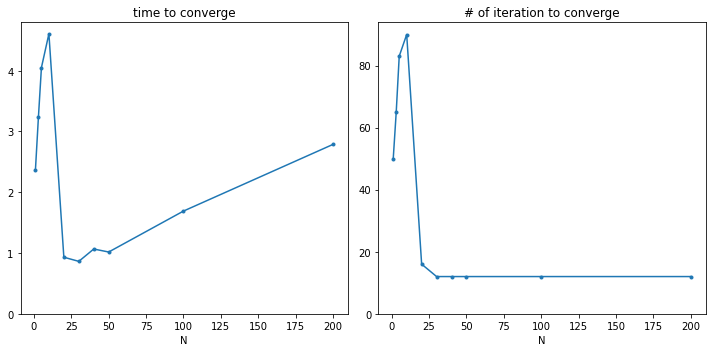

In [8]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].set_title("time to converge")
axes[0].plot(Ns, elpstms, marker=".")
axes[0].set_xlabel("N")
axes[0].set_ylim(0, None)
axes[1].set_title("# of iteration to converge")
axes[1].plot(Ns, n_iter, marker=".")
axes[1].set_xlabel("N")
axes[1].set_ylim(0, None)
fig.tight_layout()
fig.show()